## Hyperparameter Tuning: Skip 1

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Conv1D, GlobalMaxPooling1D
from keras.optimizers import Adam

# Load datasets
tf_mini = pd.read_csv('/tf_mini.csv')
log_mini = pd.read_csv('/log_mini.csv')

# Merge datasets on track_id
merged_data = pd.merge(log_mini, tf_mini, left_on='track_id_clean', right_on='track_id')

# Print out column types to determine whether one-hot encoding is necessary or not
print(merged_data.dtypes)

session_id                          object
session_position                     int64
session_length                       int64
track_id_clean                      object
skip_1                              object
skip_2                              object
skip_3                              object
not_skipped                         object
context_switch                     float64
no_pause_before_play               float64
short_pause_before_play            float64
long_pause_before_play             float64
hist_user_behavior_n_seekfwd       float64
hist_user_behavior_n_seekback      float64
hist_user_behavior_is_shuffle       object
hour_of_day                        float64
date                                object
premium                             object
context_type                        object
hist_user_behavior_reason_start     object
hist_user_behavior_reason_end       object
track_id                            object
duration                           float64
release_yea

Columns (4,5,6,7,14,17) have mixed types. Specify dtype option on import or set low_memory=False.


In [18]:
# Change 'date' to datetime
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['day_of_week'] = merged_data['date'].dt.dayofweek
merged_data['month'] = merged_data['date'].dt.month
merged_data['duration'] = merged_data['duration'].astype(float)

# One-hot encode 'object' columns
categorical_columns = ['mode', 'context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end']
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming merged_data is your DataFrame and categorical_columns is the list of your categorical columns
encoder = OneHotEncoder(sparse_output=False)  # Note: 'sparse_output' replaces 'sparse'
merged_data_encoded = encoder.fit_transform(merged_data[categorical_columns])

# Use get_feature_names_out for newer versions of scikit-learn
merged_data_encoded_df = pd.DataFrame(merged_data_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns and concatenate the one-hot encoded columns
merged_data = merged_data.drop(categorical_columns, axis=1)
merged_data = pd.concat([merged_data, merged_data_encoded_df], axis=1)


In [19]:
# Drop origional categorical columns and other 'object' columns that do not provide useful information
merged_data = merged_data.drop(['session_id', 'track_id', 'track_id_clean', 'date'], axis=1)

In [20]:
print(merged_data.dtypes)

session_position                             int64
session_length                               int64
skip_1                                      object
skip_2                                      object
skip_3                                      object
                                            ...   
hist_user_behavior_reason_end_endplay      float64
hist_user_behavior_reason_end_fwdbtn       float64
hist_user_behavior_reason_end_logout       float64
hist_user_behavior_reason_end_remote       float64
hist_user_behavior_reason_end_trackdone    float64
Length: 68, dtype: object


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import tensorflow as tf

# Convert boolean target variable to an integer (0 or 1)
# False = 0, True = 1
merged_data['skipped'] = merged_data['skip_1'].astype(int)

# Separate the features and the target variable
X = merged_data.drop(['skip_1', 'skip_2', 'skip_3','not_skipped', 'skipped'], axis=1)  # Features
y = merged_data['skipped']  # Target variable -> skip_1

In [22]:
# Standardize the features (since features are all numerical and on different scales)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(X_train)

[[ 0.13594175  0.69032755 -0.21328699 ... -0.06296224 -0.03735726
  -0.71027077]
 [ 0.86654559 -1.05858951 -0.21328699 ... -0.06296224 -0.03735726
   1.40791377]
 [ 1.59714944  0.69032755 -0.21328699 ... -0.06296224 -0.03735726
  -0.71027077]
 ...
 [-1.50791689  0.69032755 -0.21328699 ... -0.06296224 -0.03735726
   1.40791377]
 [ 0.13594175  0.1073552  -0.21328699 ... -0.06296224 -0.03735726
  -0.71027077]
 [ 0.13594175 -0.76710333 -0.21328699 ... -0.06296224 -0.03735726
  -0.71027077]]


In [24]:
print(X_test)

[[-0.95996401 -1.64156186 -0.21328699 ... -0.06296224 -0.03735726
  -0.71027077]
 [-0.59466209 -1.35007568 -0.21328699 ... -0.06296224 -0.03735726
   1.40791377]
 [ 0.50124367 -1.35007568 -0.21328699 ... -0.06296224 -0.03735726
   1.40791377]
 ...
 [ 0.68389463  0.69032755 -0.21328699 ... -0.06296224 -0.03735726
  -0.71027077]
 [ 0.50124367 -1.35007568 -0.21328699 ... -0.06296224 -0.03735726
  -0.71027077]
 [-0.41201113  0.69032755 -0.21328699 ... -0.06296224 -0.03735726
  -0.71027077]]


In [25]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.6 MB/s eta 0:00:00


In [26]:
import shutil
import os

dir_path = 'my_dir'

# Check if the directory exists
if os.path.exists(dir_path) and os.path.isdir(dir_path):
    # Delete the directory and all its contents
    shutil.rmtree(dir_path)
    print(f"Deleted directory: {dir_path}")
else:
    print(f"The directory {dir_path} does not exist.")

The directory my_dir does not exist.


## Hyperparameter Tuning with Keras Tuner

In [27]:
import kerastuner as kt
import keras
from keras import layers

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units_input', min_value=32, max_value=256, step=32) if hp else 128,
                           activation='relu', input_shape=(X_train.shape[1],)))
    # model = Sequential()
    #model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                   # activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 00m 15s]
val_accuracy: 0.8892114162445068

Best val_accuracy So Far: 0.8921141624450684
Total elapsed time: 00h 03m 19s


In [28]:
print("Best Hyperparameters:", best_hps)

Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7b464cbf9900>


### Implement Callbacks (Early Stopping)

In [29]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the CustomEarlyStopping class
class CustomEarlyStopping(EarlyStopping):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.stopped_epoch = 0

    def on_train_end(self, logs=None):
        super().on_train_end(logs)
        # Use the `stopped_epoch` attribute from the EarlyStopping base class
        self.stopped_epoch = self.stopped_epoch or self.stopped_epoch

# Create an instance of CustomEarlyStopping
early_stopping = CustomEarlyStopping(monitor='val_loss', patience=10, verbose=1)

# ModelCheckpoint to save the best model
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

# Assuming build_model is a function that returns a compiled model
model = build_model(best_hps)  # Create the model using your build_model function

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
130/130 [==============================] - 2s 7ms/step - loss: 0.4194 - accuracy: 0.8194 - val_loss: 0.3119 - val_accuracy: 0.8795
Epoch 2/50
 47/130 [=========>....................] - ETA: 0s - loss: 0.3484 - accuracy: 0.8537

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


130/130 [==============================] - 1s 5ms/step - loss: 0.3432 - accuracy: 0.8583 - val_loss: 0.2992 - val_accuracy: 0.8805
Epoch 3/50
130/130 [==============================] - 1s 4ms/step - loss: 0.3280 - accuracy: 0.8653 - val_loss: 0.2935 - val_accuracy: 0.8844
Epoch 4/50
130/130 [==============================] - 1s 5ms/step - loss: 0.3153 - accuracy: 0.8715 - val_loss: 0.2906 - val_accuracy: 0.8820
Epoch 5/50
130/130 [==============================] - 1s 5ms/step - loss: 0.3030 - accuracy: 0.8766 - val_loss: 0.2865 - val_accuracy: 0.8858
Epoch 6/50
130/130 [==============================] - 1s 5ms/step - loss: 0.3011 - accuracy: 0.8750 - val_loss: 0.2848 - val_accuracy: 0.8863
Epoch 7/50
130/130 [==============================] - 1s 4ms/step - loss: 0.2911 - accuracy: 0.8778 - val_loss: 0.2850 - val_accuracy: 0.8849
Epoch 8/50
130/130 [==============================] - 1s 4ms/step - loss: 0.2873 - accuracy: 0.8834 - val_loss: 0.2859 - val_accuracy: 0.8853
Epoch 9/50
130/13

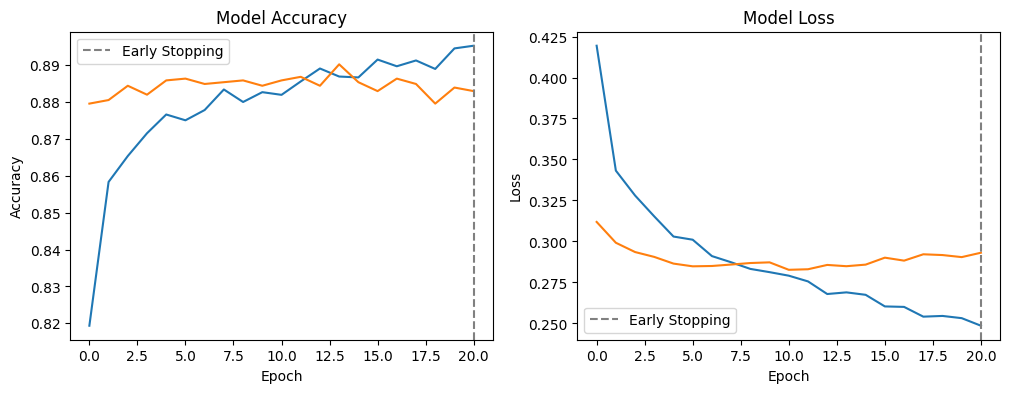

In [30]:
# Visualize the history of the model (plot model loss and model accuracy)
import matplotlib.pyplot as plt

stopped_epoch = early_stopping.stopped_epoch

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
if stopped_epoch:
    plt.axvline(x=stopped_epoch, color='gray', linestyle='--', label='Early Stopping')
    plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
if stopped_epoch:
    plt.axvline(x=stopped_epoch, color='gray', linestyle='--', label='Early Stopping')
    plt.legend()

plt.show()

In [33]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.4 MB/s eta 0:00:00


In [34]:
# To get a list of all column names from the DataFrame
feature_names = merged_data.columns.tolist()
#feature_names = ['skip_1', 'skip_2', 'skip_3']

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


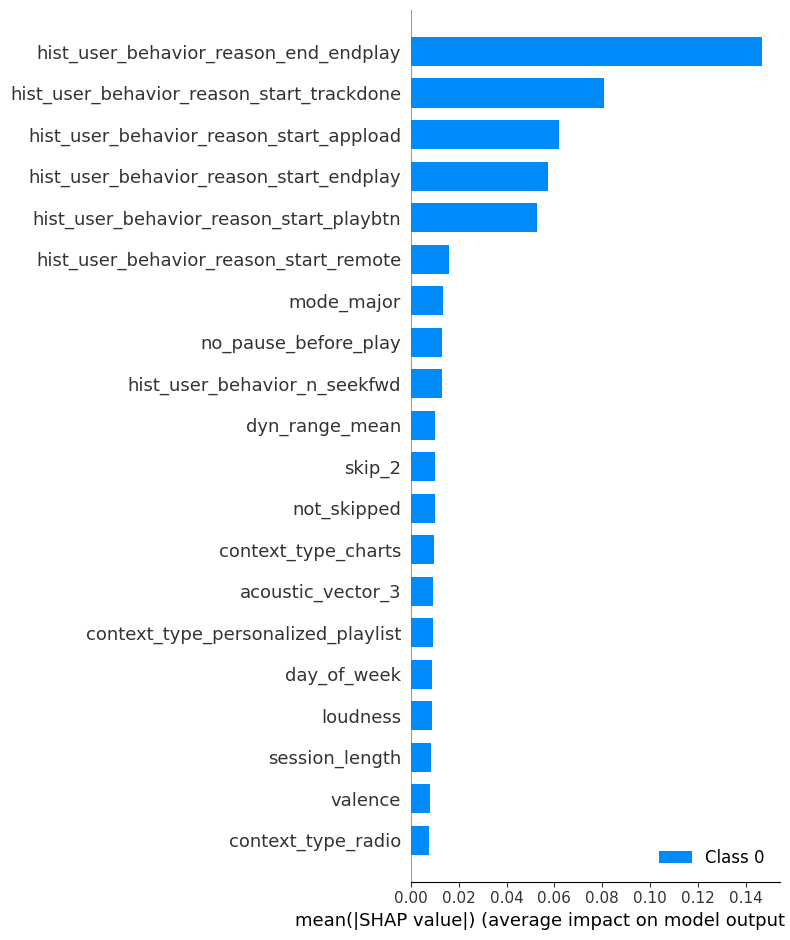

In [35]:
import shap

# Load the best model
model = keras.models.load_model('best_model.h5')

# Explain the model's predictions using SHAP
explainer = shap.DeepExplainer(model, X_train[:100])
shap_values = explainer.shap_values(X_test[:100])

# Plot the SHAP values
shap.summary_plot(shap_values, X_test[:100], feature_names=feature_names)

## Let us conduct some deeper analysis...

## 1. Refine Model Architecture

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 2. Learning rate schedule to potentially improve training dynamics

In [39]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])


Epoch 1/50
130/130 [==============================] - 7s 14ms/step - loss: 0.5540 - accuracy: 0.7308 - val_loss: 0.3780 - val_accuracy: 0.8742 - lr: 0.0010
Epoch 2/50
130/130 [==============================] - 1s 9ms/step - loss: 0.4157 - accuracy: 0.8247 - val_loss: 0.3168 - val_accuracy: 0.8853 - lr: 0.0010
Epoch 3/50
130/130 [==============================] - 1s 8ms/step - loss: 0.3802 - accuracy: 0.8413 - val_loss: 0.3000 - val_accuracy: 0.8882 - lr: 0.0010
Epoch 4/50
130/130 [==============================] - 1s 8ms/step - loss: 0.3598 - accuracy: 0.8536 - val_loss: 0.2926 - val_accuracy: 0.8882 - lr: 0.0010
Epoch 5/50
130/130 [==============================] - 1s 9ms/step - loss: 0.3504 - accuracy: 0.8551 - val_loss: 0.2856 - val_accuracy: 0.8897 - lr: 0.0010
Epoch 6/50
130/130 [==============================] - 1s 11ms/step - loss: 0.3438 - accuracy: 0.8586 - val_loss: 0.2838 - val_accuracy: 0.8902 - lr: 0.0010
Epoch 7/50
130/130 [==============================] - 2s 13ms/step -

## 3. Hyperparameter Tuning


In [48]:
import tensorflow as tf
from tensorflow import keras

!pip install keras-tuner
import kerastuner
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization

In [49]:
# Initialize Tuner
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    directory='my_dir',
    project_name='spotify_skip_behavior'
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

# Best hyperparameter
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Trial 30 Complete [00h 00m 10s]
val_accuracy: 0.8872762322425842

Best val_accuracy So Far: 0.8925979733467102
Total elapsed time: 00h 03m 33s
Epoch 1/50
130/130 [==============================] - 1s 5ms/step - loss: 0.4340 - accuracy: 0.8128 - val_loss: 0.3269 - val_accuracy: 0.8776
Epoch 2/50
130/130 [==============================] - 0s 3ms/step - loss: 0.3449 - accuracy: 0.8627 - val_loss: 0.3091 - val_accuracy: 0.8810
Epoch 3/50
130/130 [==============================] - 0s 4ms/step - loss: 0.3217 - accuracy: 0.8679 - val_loss: 0.3006 - val_accuracy: 0.8849
Epoch 4/50
130/130 [==============================] - 0s 4ms/step - loss: 0.3164 - accuracy: 0.8711 - val_loss: 0.2993 - val_accuracy: 0.8844
Epoch 5/50
130/130 [==============================] - 0s 4ms/step - loss: 0.3046 - accuracy: 0.8742 - val_loss: 0.2984 - val_accuracy: 0.8839
Epoch 6/50
130/130 [==============================] - 0s 4ms/step - loss: 0.2962 - accuracy: 0.8774 - val_loss: 0.2965 - val_accuracy: 0.8786
Epoch

## 4. Model Evaluation with ROC Curve and AUC

81/81 [==============================] - 0s 1ms/step


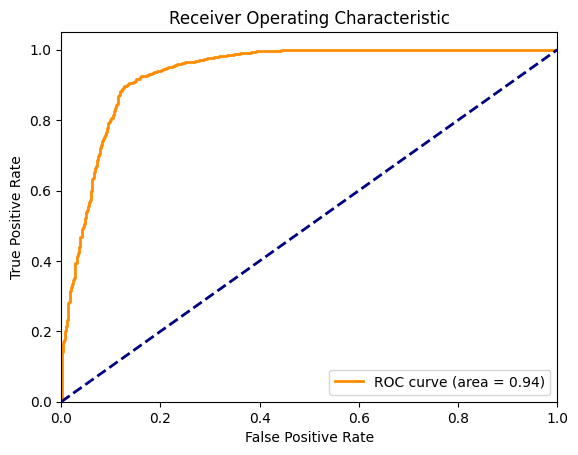

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## 5. Use SHAP to interpret model's predictions

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


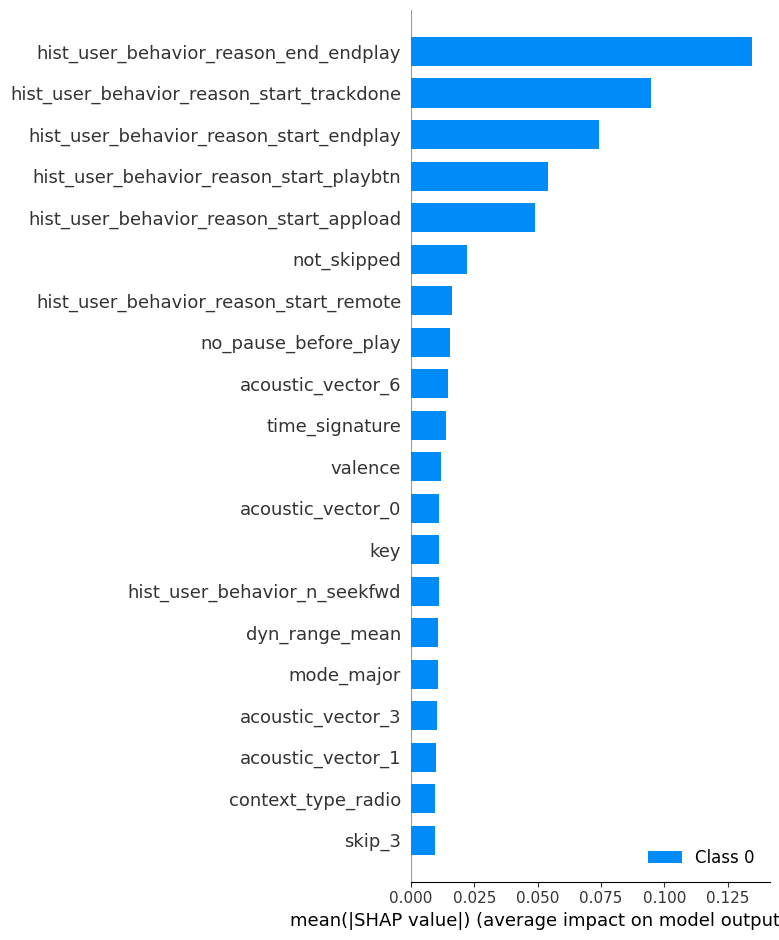

In [51]:
import shap

explainer = shap.DeepExplainer(model, X_train[:100])
shap_values = explainer.shap_values(X_test[:100])

shap.summary_plot(shap_values, X_test[:100], feature_names=feature_names)